<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/IPL_EDA%26nORMALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('/content/matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df.dtypes

,0
id,int64
season,int64
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object
dl_applied,int64


In [7]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
df.isnull().sum()

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [18]:
print("number of row:",df.shape[0])
print("number of columns:",df.shape[1])

number of row: 756
number of columns: 18


Which city has hosted the most IPL matches over the years?


In [19]:
# Drop rows with missing city if any
df_clean = df.dropna(subset=['city'])

In [20]:
 #Count matches per city
city_counts = df_clean['city'].value_counts().reset_index()
city_counts.columns = ['city', 'match_count']

In [21]:
# Identify city with most matches
most_hosted_city = city_counts.iloc[0]['city']
most_hosted_count = city_counts.iloc[0]['match_count']

print(f"The city that hosted the most IPL matches is: {most_hosted_city} with {most_hosted_count} matches.")


The city that hosted the most IPL matches is: Mumbai with 101 matches.


In [22]:
# Min-max normalization
min_c = city_counts['match_count'].min()
max_c = city_counts['match_count'].max()
city_counts['minmax_norm'] = (city_counts['match_count'] - min_c) / (max_c - min_c)

In [23]:
# Z-score normalization
mean_c = city_counts['match_count'].mean()
std_c = city_counts['match_count'].std()
city_counts['zscore_norm'] = (city_counts['match_count'] - mean_c) / std_c

In [24]:
# Normalize so sum = 1 (proportion)
total_c = city_counts['match_count'].sum()
city_counts['proportion_norm'] = city_counts['match_count'] / total_c


In [25]:
print("\nCity match counts with normalization:")
print(city_counts)


City match counts with normalization:
              city  match_count  minmax_norm  zscore_norm  proportion_norm
0           Mumbai          101     1.000000     2.834072         0.134846
1          Kolkata           77     0.757576     1.957484         0.102804
2            Delhi           74     0.727273     1.847911         0.098798
3        Bangalore           66     0.646465     1.555715         0.088117
4        Hyderabad           64     0.626263     1.482666         0.085447
5          Chennai           57     0.555556     1.226994         0.076101
6           Jaipur           47     0.454545     0.861750         0.062750
7       Chandigarh           46     0.444444     0.825225         0.061415
8             Pune           38     0.363636     0.533029         0.050734
9           Durban           15     0.131313    -0.307034         0.020027
10       Bengaluru           14     0.121212    -0.343558         0.018692
11   Visakhapatnam           13     0.111111    -0.380083    

How has the number of matches played changed across different IPL seasons?


In [26]:
# Group by season and count matches
season_counts = df['season'].value_counts().reset_index()
season_counts.columns = ['season', 'match_count']
season_counts = season_counts.sort_values(by='season')



In [27]:
# Min-max normalization
min_c = season_counts['match_count'].min()
max_c = season_counts['match_count'].max()
season_counts['minmax_norm'] = (season_counts['match_count'] - min_c) / (max_c - min_c)


In [28]:
# Z-score normalization
mean_c = season_counts['match_count'].mean()
std_c = season_counts['match_count'].std()
season_counts['zscore_norm'] = (season_counts['match_count'] - mean_c) / std_c


In [29]:
# Normalize so sum = 1 (proportion)
total_c = season_counts['match_count'].sum()
season_counts['proportion_norm'] = season_counts['match_count'] / total_c

print("Matches per season with normalization:")
print(season_counts)

Matches per season with normalization:
    season  match_count  minmax_norm  zscore_norm  proportion_norm
10    2008           58     0.052632    -0.721688         0.076720
11    2009           57     0.000000    -0.866025         0.075397
3     2010           60     0.157895    -0.433013         0.079365
2     2011           73     0.842105     1.443376         0.096561
1     2012           74     0.894737     1.587713         0.097884
0     2013           76     1.000000     1.876388         0.100529
7     2014           60     0.157895    -0.433013         0.079365
9     2015           59     0.105263    -0.577350         0.078042
4     2016           60     0.157895    -0.433013         0.079365
8     2017           59     0.105263    -0.577350         0.078042
5     2018           60     0.157895    -0.433013         0.079365
6     2019           60     0.157895    -0.433013         0.079365


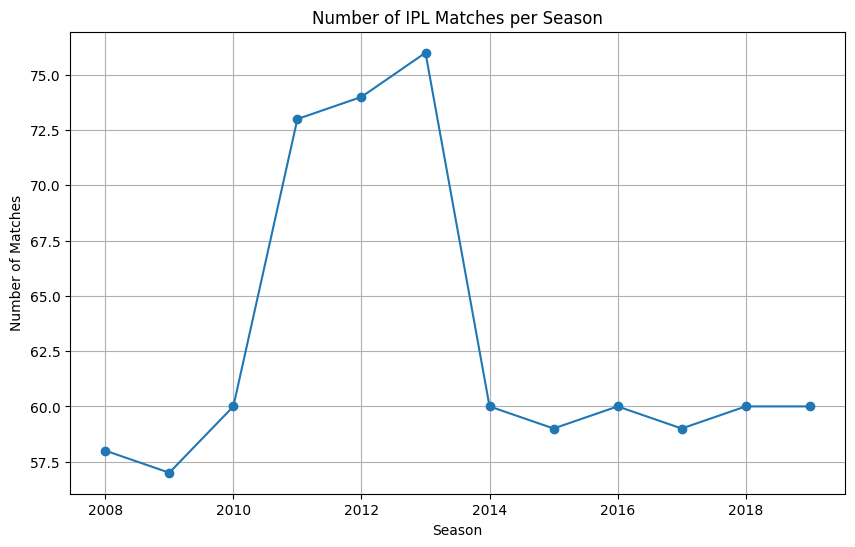

In [30]:
plt.figure(figsize=(10,6))
plt.plot(season_counts['season'], season_counts['match_count'], marker='o')
plt.title('Number of IPL Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

Which team has won the most tosses and how often does that team win the match as well?


In [31]:
# Count toss wins per team
toss_wins = df['toss_winner'].value_counts().reset_index()
toss_wins.columns = ['team', 'toss_wins']

# Find team with most toss wins
top_team = toss_wins.iloc[0]['team']
top_toss_wins = toss_wins.iloc[0]['toss_wins']

In [32]:
# Filter matches where this team won the toss
top_team_matches = df[df['toss_winner'] == top_team]

# Count matches where team won both toss and match
top_team_both = top_team_matches[top_team_matches['winner'] == top_team].shape[0]


In [33]:
# Compute proportion
proportion_both = top_team_both / top_toss_wins

print(f"The team with the most toss wins is: {top_team} ({top_toss_wins} toss wins).")
print(f"{top_team} also won the match {top_team_both} times after winning the toss.")
print(f"Proportion of matches where {top_team} won both toss and match: {proportion_both:.2f}")


The team with the most toss wins is: Mumbai Indians (98 toss wins).
Mumbai Indians also won the match 56 times after winning the toss.
Proportion of matches where Mumbai Indians won both toss and match: 0.57


In [34]:
min_wins = toss_wins['toss_wins'].min()
max_wins = toss_wins['toss_wins'].max()
mean_wins = toss_wins['toss_wins'].mean()
std_wins = toss_wins['toss_wins'].std()

toss_wins['minmax_norm'] = (toss_wins['toss_wins'] - min_wins) / (max_wins - min_wins)
toss_wins['zscore_norm'] = (toss_wins['toss_wins'] - mean_wins) / std_wins
toss_wins['proportion_norm'] = toss_wins['toss_wins'] / toss_wins['toss_wins'].sum()

print("\nToss wins with normalization:")
print(toss_wins)


Toss wins with normalization:
                           team  toss_wins  minmax_norm  zscore_norm  \
0                Mumbai Indians         98     1.000000     1.304246   
1         Kolkata Knight Riders         92     0.934783     1.139845   
2           Chennai Super Kings         89     0.902174     1.057645   
3               Kings XI Punjab         81     0.815217     0.838444   
4   Royal Challengers Bangalore         81     0.815217     0.838444   
5              Delhi Daredevils         80     0.804348     0.811044   
6              Rajasthan Royals         80     0.804348     0.811044   
7           Sunrisers Hyderabad         46     0.434783    -0.120561   
8               Deccan Chargers         43     0.402174    -0.202761   
9                 Pune Warriors         20     0.152174    -0.832964   
10                Gujarat Lions         15     0.097826    -0.969964   
11               Delhi Capitals         10     0.043478    -1.106965   
12         Kochi Tuskers Kerala  

What is the average win margin (by runs and wickets) for each team?


In [35]:
# Drop rows where winner is missing (no result / tie)
df_clean = df.dropna(subset=['winner'])

In [36]:
# Group by winner and compute mean win margins
win_margins = df_clean.groupby('winner').agg({
    'win_by_runs': 'mean',
    'win_by_wickets': 'mean'
}).reset_index()

In [37]:
# Rename columns for clarity
win_margins.columns = ['team', 'avg_win_by_runs', 'avg_win_by_wickets']

print("Average win margins by team:")
print(win_margins)


Average win margins by team:
                           team  avg_win_by_runs  avg_win_by_wickets
0           Chennai Super Kings        17.780000            2.890000
1               Deccan Chargers        14.517241            2.482759
2                Delhi Capitals         9.200000            2.900000
3              Delhi Daredevils        10.074627            4.104478
4                 Gujarat Lions         0.076923            5.000000
5               Kings XI Punjab        11.280488            3.268293
6          Kochi Tuskers Kerala         3.833333            5.000000
7         Kolkata Knight Riders        11.804348            3.815217
8                Mumbai Indians        17.119266            2.816514
9                 Pune Warriors        11.583333            3.000000
10             Rajasthan Royals        11.933333            3.640000
11       Rising Pune Supergiant        12.300000            3.100000
12      Rising Pune Supergiants        10.600000            4.000000
13  R

In [38]:
# Normalize avg_win_by_runs (min-max, z-score)
min_r = win_margins['avg_win_by_runs'].min()
max_r = win_margins['avg_win_by_runs'].max()
mean_r = win_margins['avg_win_by_runs'].mean()
std_r = win_margins['avg_win_by_runs'].std()

win_margins['runs_minmax_norm'] = (win_margins['avg_win_by_runs'] - min_r) / (max_r - min_r)
win_margins['runs_zscore_norm'] = (win_margins['avg_win_by_runs'] - mean_r) / std_r


In [39]:
# Normalize avg_win_by_wickets (min-max, z-score)
min_w = win_margins['avg_win_by_wickets'].min()
max_w = win_margins['avg_win_by_wickets'].max()
mean_w = win_margins['avg_win_by_wickets'].mean()
std_w = win_margins['avg_win_by_wickets'].std()

win_margins['wickets_minmax_norm'] = (win_margins['avg_win_by_wickets'] - min_w) / (max_w - min_w)
win_margins['wickets_zscore_norm'] = (win_margins['avg_win_by_wickets'] - mean_w) / std_w

print("\nWin margins with normalization:")
print(win_margins)


Win margins with normalization:
                           team  avg_win_by_runs  avg_win_by_wickets  \
0           Chennai Super Kings        17.780000            2.890000   
1               Deccan Chargers        14.517241            2.482759   
2                Delhi Capitals         9.200000            2.900000   
3              Delhi Daredevils        10.074627            4.104478   
4                 Gujarat Lions         0.076923            5.000000   
5               Kings XI Punjab        11.280488            3.268293   
6          Kochi Tuskers Kerala         3.833333            5.000000   
7         Kolkata Knight Riders        11.804348            3.815217   
8                Mumbai Indians        17.119266            2.816514   
9                 Pune Warriors        11.583333            3.000000   
10             Rajasthan Royals        11.933333            3.640000   
11       Rising Pune Supergiant        12.300000            3.100000   
12      Rising Pune Supergiants

How do toss decisions (bat or field) vary across different seasons?


In [40]:
# Drop missing toss_decision or season (if any)
df_clean = df.dropna(subset=['season', 'toss_decision'])

# Group by season and toss decision
toss_decision_counts = df_clean.groupby(['season', 'toss_decision']).size().reset_index(name='count')


In [41]:
# Pivot for better display
pivot = toss_decision_counts.pivot(index='season', columns='toss_decision', values='count').fillna(0)

In [42]:
# Calculate proportions
pivot['bat_proportion'] = pivot['bat'] / (pivot['bat'] + pivot['field'])
pivot['field_proportion'] = pivot['field'] / (pivot['bat'] + pivot['field'])

print("Toss decisions by season (with proportions):")
print(pivot)

Toss decisions by season (with proportions):
toss_decision  bat  field  bat_proportion  field_proportion
season                                                     
2008            26     32        0.448276          0.551724
2009            35     22        0.614035          0.385965
2010            39     21        0.650000          0.350000
2011            25     48        0.342466          0.657534
2012            37     37        0.500000          0.500000
2013            45     31        0.592105          0.407895
2014            19     41        0.316667          0.683333
2015            25     34        0.423729          0.576271
2016            11     49        0.183333          0.816667
2017            11     48        0.186441          0.813559
2018            10     50        0.166667          0.833333
2019            10     50        0.166667          0.833333


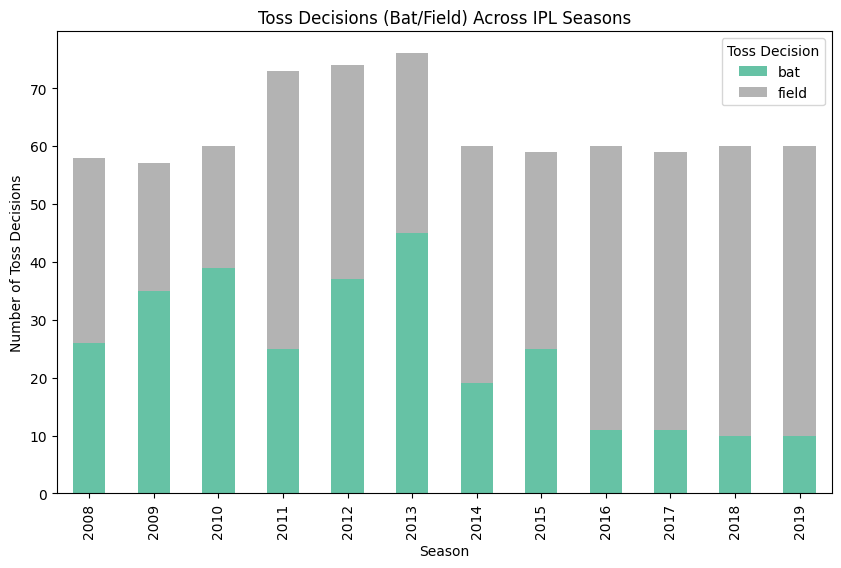

In [43]:
pivot_plot = pivot[['bat', 'field']]
pivot_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='Set2'
)
plt.title('Toss Decisions (Bat/Field) Across IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.legend(title='Toss Decision')
plt.show()

What are the most common types of player dismissals in IPL matches?



In [45]:
df = pd.read_csv('/content/deliveries.csv')


In [46]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [47]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [48]:
# Drop rows with no dismissal (i.e. dismissal_kind is NaN)
dismissals = df.dropna(subset=['dismissal_kind'])

# Count dismissal types
dismissal_counts = dismissals['dismissal_kind'].value_counts().reset_index()
dismissal_counts.columns = ['dismissal_kind', 'count']

In [49]:
# Normalize: proportion
total_dismissals = dismissal_counts['count'].sum()
dismissal_counts['proportion'] = dismissal_counts['count'] / total_dismissals


In [50]:
#  min-max normalization
min_c = dismissal_counts['count'].min()
max_c = dismissal_counts['count'].max()
dismissal_counts['minmax_norm'] = (dismissal_counts['count'] - min_c) / (max_c - min_c)

# z-score normalization
mean_c = dismissal_counts['count'].mean()
std_c = dismissal_counts['count'].std()
dismissal_counts['zscore_norm'] = (dismissal_counts['count'] - mean_c) / std_c

print("Most common types of player dismissals (with normalization):")
print(dismissal_counts)

Most common types of player dismissals (with normalization):
          dismissal_kind  count  proportion  minmax_norm  zscore_norm
0                 caught   4373    0.587927     1.000000     2.526276
1                 bowled   1382    0.185803     0.315874     0.395732
2                run out    755    0.101506     0.172461    -0.050891
3                    lbw    455    0.061172     0.103843    -0.264587
4                stumped    243    0.032670     0.055352    -0.415598
5      caught and bowled    211    0.028368     0.048033    -0.438392
6           retired hurt      9    0.001210     0.001830    -0.582281
7             hit wicket      9    0.001210     0.001830    -0.582281
8  obstructing the field      1    0.000134     0.000000    -0.587979


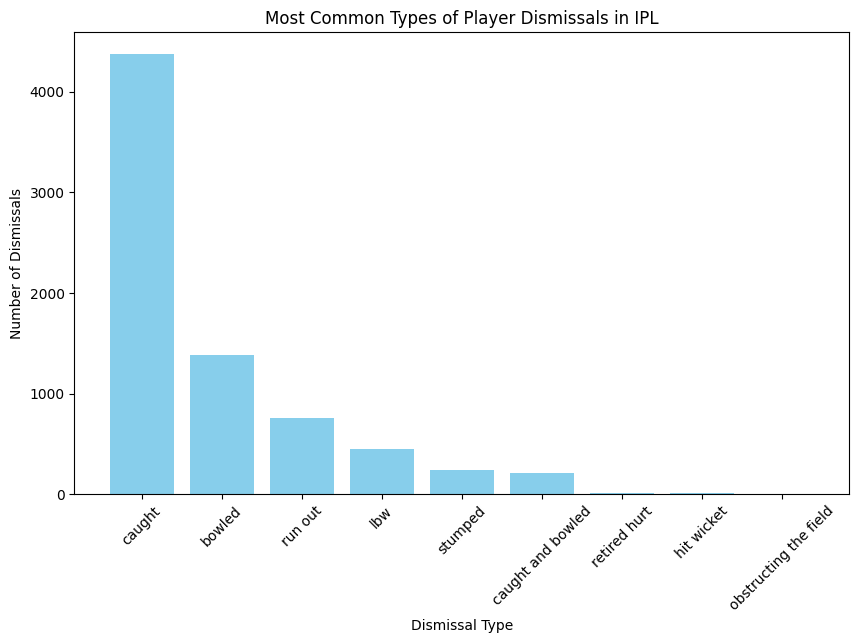

In [51]:
plt.figure(figsize=(10,6))
plt.bar(dismissal_counts['dismissal_kind'], dismissal_counts['count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Most Common Types of Player Dismissals in IPL')
plt.ylabel('Number of Dismissals')
plt.xlabel('Dismissal Type')
plt.show()

Which teams have the highest win percentage in knockout/final matches?



In [56]:
df = pd.read_csv('matches.csv')

In [58]:
knockout_keywords = ['Final', 'Qualifier', 'Eliminator']
# Filter for knockout matches based on keywords in the 'id' column (assuming id represents match number or a similar identifier)
# Note: The 'id' column contains integers. We'll convert it to string to use .str.contains()
# This might not be a completely accurate way to identify knockout matches without
# more information about how they are specifically marked in this dataset.
knockout_matches = df[df['id'].astype(str).str.contains('|'.join(knockout_keywords), case=False, na=False)]

In [59]:
#Count matches played per team in knockouts
team_played = pd.concat([
    knockout_matches[['team1']].rename(columns={'team1':'team'}),
    knockout_matches[['team2']].rename(columns={'team2':'team'})
])
matches_played = team_played['team'].value_counts().reset_index()
matches_played.columns = ['team', 'knockout_matches_played']


In [60]:
# Count wins per team in knockouts
wins = knockout_matches['winner'].value_counts().reset_index()
wins.columns = ['team', 'knockout_wins']


In [61]:
# Merge and compute win percentage
result = pd.merge(matches_played, wins, on='team', how='left').fillna(0)
result['win_percentage'] = (result['knockout_wins'] / result['knockout_matches_played']) * 100


In [62]:
# Normalize win % (optional)
min_w = result['win_percentage'].min()
max_w = result['win_percentage'].max()
mean_w = result['win_percentage'].mean()
std_w = result['win_percentage'].std()

result['minmax_norm'] = (result['win_percentage'] - min_w) / (max_w - min_w)
result['zscore_norm'] = (result['win_percentage'] - mean_w) / std_w

print("Knockout match win percentages (with normalization):")
print(result.sort_values(by='win_percentage', ascending=False))

Knockout match win percentages (with normalization):
Empty DataFrame
Columns: [team, knockout_matches_played, knockout_wins, win_percentage, minmax_norm, zscore_norm]
Index: []


What is the distribution of matches won by batting first vs. chasing across venues?



In [63]:
# Drop rows with missing crucial data
df_clean = df.dropna(subset=['venue', 'winner', 'toss_winner', 'toss_decision', 'team1', 'team2'])


In [65]:
 #Determine which team batted first
def who_batted_first(row):
    if row['toss_decision'] == 'bat':
        return row['toss_winner']
    else:
        return row['team1'] if row['toss_winner'] != row['team1'] else row['team2']

df_clean['batted_first'] = df_clean.apply(who_batted_first, axis=1)


In [66]:
# Determine win type
df_clean['win_type'] = df_clean.apply(lambda x: 'bat_first' if x['winner'] == x['batted_first'] else 'chase', axis=1)


In [67]:
# Group by venue + win_type
venue_win = df_clean.groupby(['venue', 'win_type']).size().reset_index(name='match_count')

# Pivot to get bat_first / chase in columns
venue_pivot = venue_win.pivot(index='venue', columns='win_type', values='match_count').fillna(0)


In [68]:
# Compute proportions
venue_pivot['total'] = venue_pivot['bat_first'] + venue_pivot['chase']
venue_pivot['bat_first_prop'] = venue_pivot['bat_first'] / venue_pivot['total']
venue_pivot['chase_prop'] = venue_pivot['chase'] / venue_pivot['total']

print("Distribution of matches won by batting first vs chasing across venues:")
print(venue_pivot.sort_values(by='total', ascending=False))


Distribution of matches won by batting first vs chasing across venues:
win_type                                            bat_first  chase  total  \
venue                                                                         
Eden Gardens                                             30.0   47.0   77.0   
Wankhede Stadium                                         36.0   37.0   73.0   
M Chinnaswamy Stadium                                    30.0   41.0   71.0   
Feroz Shah Kotla                                         32.0   34.0   66.0   
Rajiv Gandhi International Stadium, Uppal                22.0   34.0   56.0   
MA Chidambaram Stadium, Chepauk                          31.0   18.0   49.0   
Sawai Mansingh Stadium                                   15.0   32.0   47.0   
Punjab Cricket Association Stadium, Mohali               15.0   20.0   35.0   
Maharashtra Cricket Association Stadium                   7.0   14.0   21.0   
Subrata Roy Sahara Stadium                               11.

In [83]:
# Calculate total matches per venue
venue_pivot['total'] = venue_pivot['bat_first'] + venue_pivot['chase']
print("venue_pivot['total']")

venue_pivot['total']


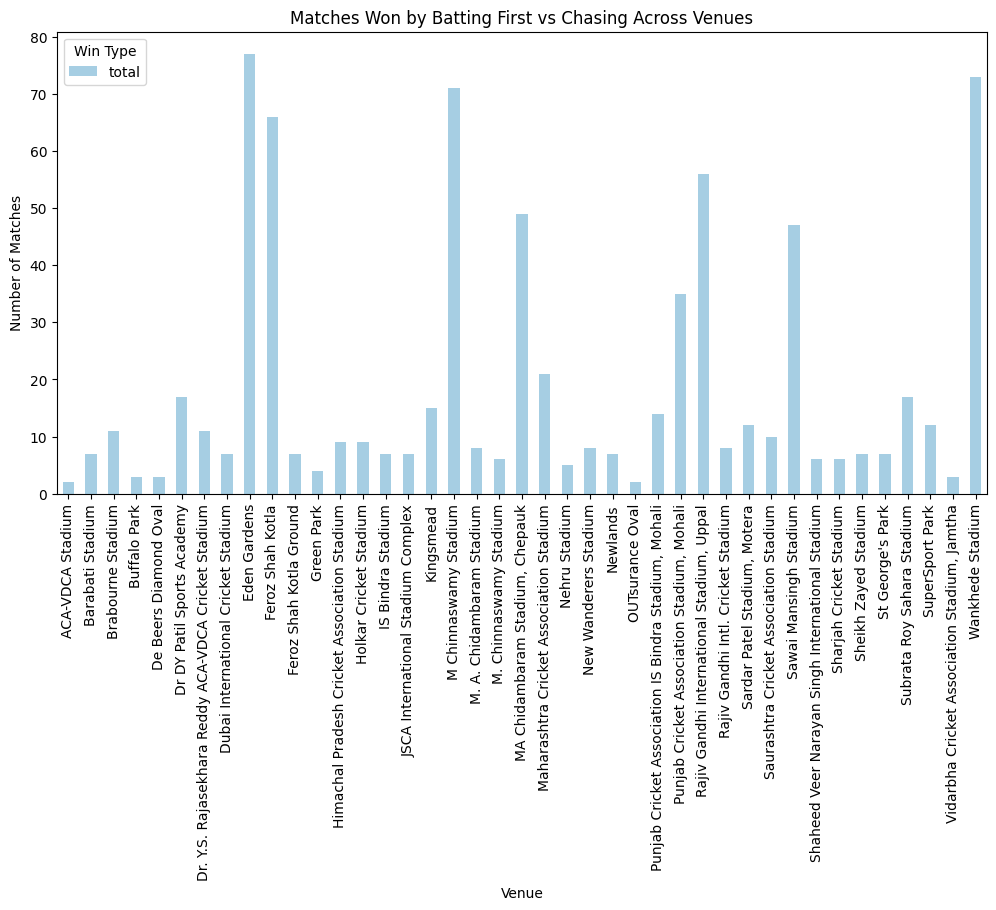

In [84]:
# Plot the distribution
venue_pivot['total'].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='Paired'
)
plt.title('Matches Won by Batting First vs Chasing Across Venues')
plt.ylabel('Number of Matches')
plt.xlabel('Venue')
plt.legend(title='Win Type')
plt.show()

Which players consistently perform well in terms of runs or wickets across multiple seasons?



In [85]:
matches = pd.read_csv('/content/matches.csv')
deliveries = pd.read_csv('/content/deliveries.csv')

In [86]:
# Merge to bring season into deliveries
df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')


In [87]:
# ---- BATSMAN PERFORMANCE ----
batsman_perf = df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()


In [89]:
# ---- BOWLER PERFORMANCE ----
# Count wickets credited to bowler (exclude run out, retired hurt, obstructing field)
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

wickets_df = df[df['dismissal_kind'].isin(valid_dismissals)]
bowler_perf = wickets_df.groupby(['season', 'bowler']).size().reset_index(name='wickets')


In [90]:
# ---- Consistency analysis ----
# For batsman: players with 300+ runs in a season
top_batsmen = batsman_perf[batsman_perf['batsman_runs'] >= 300]
batsman_consistency = top_batsmen.groupby('batsman')['season'].nunique().reset_index()
batsman_consistency.columns = ['player', 'num_seasons_above_300']


In [91]:
# For bowler: players with 10+ wickets in a season
top_bowlers = bowler_perf[bowler_perf['wickets'] >= 10]
bowler_consistency = top_bowlers.groupby('bowler')['season'].nunique().reset_index()
bowler_consistency.columns = ['player', 'num_seasons_above_10_wkts']


In [92]:
# ---- Output results ----
print("✅ Consistent batsmen (300+ runs in multiple seasons):")
print(batsman_consistency.sort_values(by='num_seasons_above_300', ascending=False))

print("\n✅ Consistent bowlers (10+ wickets in multiple seasons):")
print(bowler_consistency.sort_values(by='num_seasons_above_10_wkts', ascending=False))

✅ Consistent batsmen (300+ runs in multiple seasons):
             player  num_seasons_above_300
50        RG Sharma                     10
58         SK Raina                     10
54         S Dhawan                      8
20        G Gambhir                      8
68          V Kohli                      8
..              ...                    ...
63        SS Tiwary                      1
66         TL Suman                      1
67       TM Dilshan                      1
71  Y Venugopal Rao                      1
70          WP Saha                      1

[74 rows x 2 columns]

✅ Consistent bowlers (10+ wickets in multiple seasons):
              player  num_seasons_above_10_wkts
72         PP Chawla                          9
92        SL Malinga                          8
2           A Mishra                          8
75          R Ashwin                          7
34   Harbhajan Singh                          6
..               ...                        ...
104         VR

In [94]:
#normalize batsman runs within season
batsman_perf['minmax_norm'] = batsman_perf.groupby('season')['batsman_runs'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

#normalize bowler wickets within season
bowler_perf['minmax_norm'] = bowler_perf.groupby('season')['wickets'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

How do win margins correlate with toss decisions and venues?

In [102]:
df = pd.read_csv('/content/matches.csv')

In [103]:
# Drop rows with missing values
df_clean = df.dropna(subset=['venue', 'toss_decision', 'win_by_runs', 'win_by_wickets'])

# Encode toss_decision for correlation (bat=0, field=1)
df_clean['toss_decision_num'] = df_clean['toss_decision'].map({'bat': 0, 'field': 1})


In [104]:
# Encode toss_decision for correlation (bat=0, field=1)
df_clean['toss_decision_num'] = df_clean['toss_decision'].map({'bat': 0, 'field': 1})

# Group by venue and toss decision
grouped = df_clean.groupby(['venue', 'toss_decision']).agg({
    'win_by_runs': 'mean',
    'win_by_wickets': 'mean'
}).reset_index()

print("✅ Average win margins by venue and toss decision:")
print(grouped)


✅ Average win margins by venue and toss decision:
                                           venue toss_decision  win_by_runs  \
0                               ACA-VDCA Stadium         field     0.000000   
1                               Barabati Stadium           bat    11.500000   
2                               Barabati Stadium         field    10.000000   
3                              Brabourne Stadium           bat    19.166667   
4                              Brabourne Stadium         field     4.200000   
..                                           ...           ...          ...   
71                               SuperSport Park         field     6.333333   
72  Vidarbha Cricket Association Stadium, Jamtha           bat     1.000000   
73  Vidarbha Cricket Association Stadium, Jamtha         field    13.000000   
74                              Wankhede Stadium           bat    16.636364   
75                              Wankhede Stadium         field    11.176471   

 

In [105]:
# Correlation with numeric toss decision
corr_runs = df_clean[['toss_decision_num', 'win_by_runs']].corr().iloc[0,1]
corr_wickets = df_clean[['toss_decision_num', 'win_by_wickets']].corr().iloc[0,1]

print(f"\n✅ Correlation between toss decision (field=1, bat=0) and win_by_runs: {corr_runs:.3f}")
print(f"✅ Correlation between toss decision (field=1, bat=0) and win_by_wickets: {corr_wickets:.3f}")




✅ Correlation between toss decision (field=1, bat=0) and win_by_runs: 0.017
✅ Correlation between toss decision (field=1, bat=0) and win_by_wickets: 0.005


In [106]:
# Normalize win margins (optional)
grouped['runs_minmax_norm'] = (grouped['win_by_runs'] - grouped['win_by_runs'].min()) / (grouped['win_by_runs'].max() - grouped['win_by_runs'].min())
grouped['wickets_minmax_norm'] = (grouped['win_by_wickets'] - grouped['win_by_wickets'].min()) / (grouped['win_by_wickets'].max() - grouped['win_by_wickets'].min())

print("\n✅ Normalized win margins by venue and toss decision:")
print(grouped)


✅ Normalized win margins by venue and toss decision:
                                           venue toss_decision  win_by_runs  \
0                               ACA-VDCA Stadium         field     0.000000   
1                               Barabati Stadium           bat    11.500000   
2                               Barabati Stadium         field    10.000000   
3                              Brabourne Stadium           bat    19.166667   
4                              Brabourne Stadium         field     4.200000   
..                                           ...           ...          ...   
71                               SuperSport Park         field     6.333333   
72  Vidarbha Cricket Association Stadium, Jamtha           bat     1.000000   
73  Vidarbha Cricket Association Stadium, Jamtha         field    13.000000   
74                              Wankhede Stadium           bat    16.636364   
75                              Wankhede Stadium         field    11.176471  

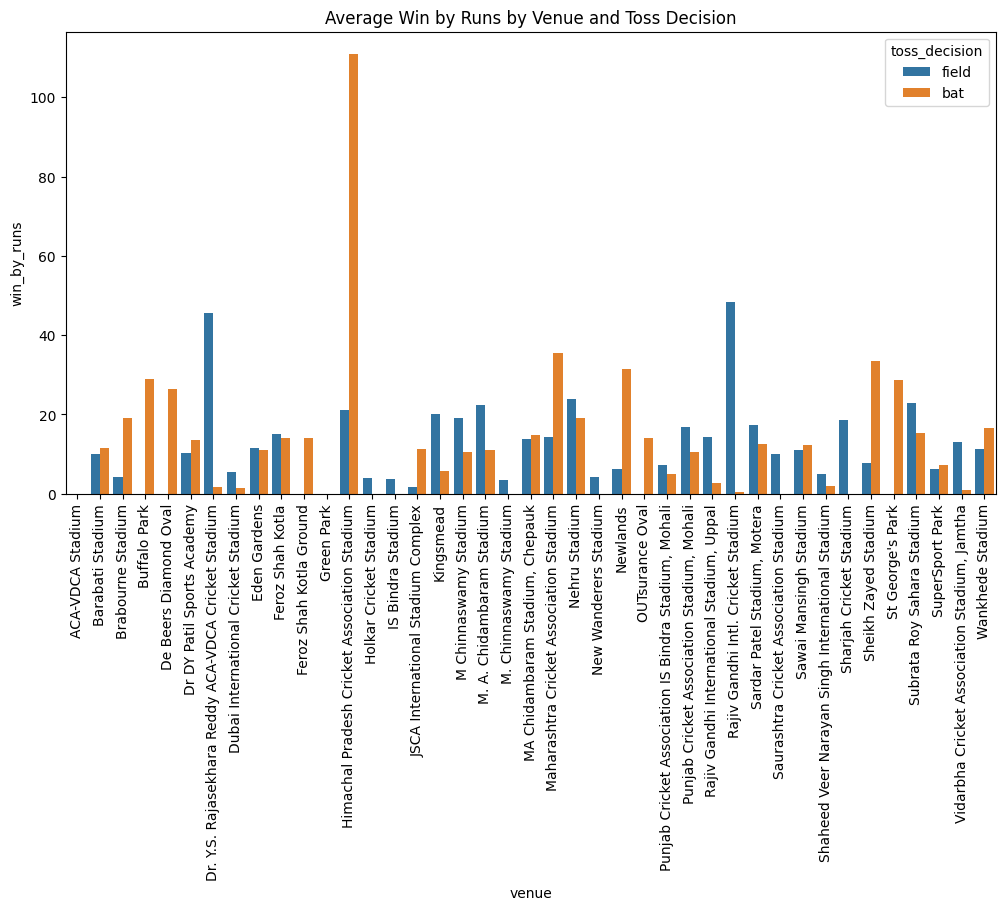

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='venue', y='win_by_runs', hue='toss_decision')
plt.title('Average Win by Runs by Venue and Toss Decision')
plt.xticks(rotation=90)
plt.show()

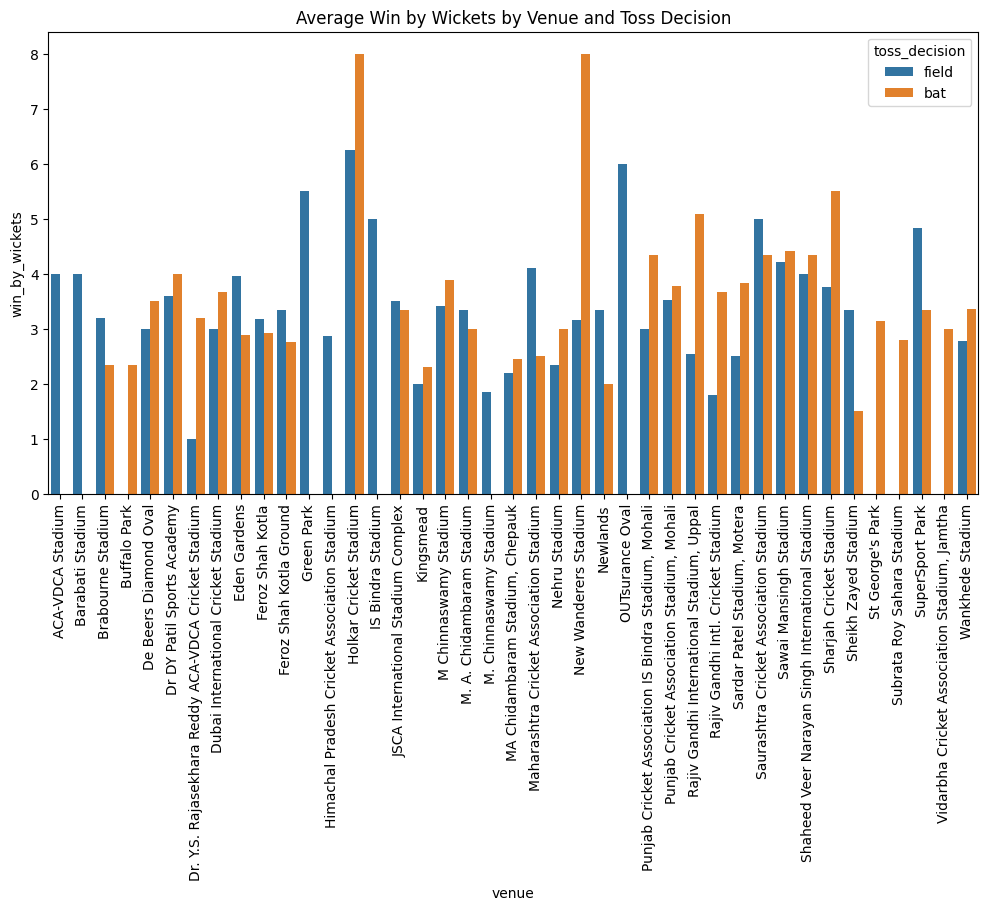

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='venue', y='win_by_wickets', hue='toss_decision')
plt.title('Average Win by Wickets by Venue and Toss Decision')
plt.xticks(rotation=90)
plt.show()

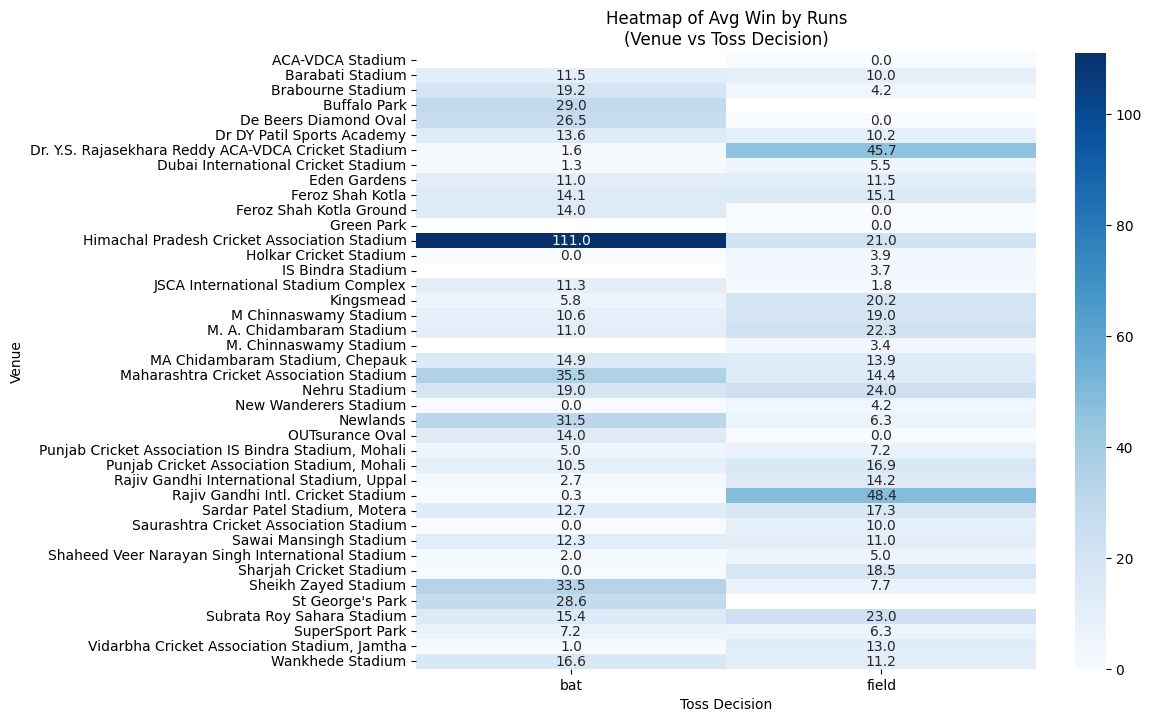

In [110]:
pivot_runs = grouped.pivot(index='venue', columns='toss_decision', values='win_by_runs')
plt.figure(figsize=(10,8))
sns.heatmap(pivot_runs, annot=True, fmt=".1f", cmap="Blues")
plt.title('Heatmap of Avg Win by Runs\n(Venue vs Toss Decision)')
plt.ylabel('Venue')
plt.xlabel('Toss Decision')
plt.show()